# Assignment 1: My Heart Will Go On (but not yours?!?)

Today's assignment was inspired by a student's question, wondering if network analysis could be applied to the Titanic dataset. Instead of using the somewhat tragic dataset about surviving or perishing in the Titanic disaster, we will focus on the events leading up to it and try to solve the mystery behind why Rose didn't help Jack from dying.

<img title='Titanic' style="float: right;" src='https://www.firstforwomen.com/wp-content/uploads/sites/2/2024/09/kate-winslet-titanic.jpg?w=953&quality=86&strip=all' width="700">

We will use **James Cameron’s** 1997 film [Titanic](https://www.imdb.com/title/tt0120338/), starring Leonardo DiCaprio (as Jack) and Kate Winslet (as Rose). The film is based on a partly true story, though with a few inaccuracies.

One example is [Violet Jessop](https://www.youtube.com/watch?v=ERDHDAR3ZsU&ab_channel=titanicstories), a woman who survived the RMS Olympic (1911), RMS Titanic (1912), and later the HMHS Britannic (1916), which sank after hitting a German naval mine. In the film, she was depicted as an elderly Third-Class stewardess, instead of a First-Class stewardess who was about 24 years old.


### Dataset
Dataset consists of two files: **edges.csv** & **nodes.csv**. The names of the file should be selfexpenatory. Data was constructed from film's script, published [here](https://imsdb.com/scripts/Titanic.html), and present the coocurence of the characters in each scene. Both files are in the github repository of the assigment.  

In **edges.csv** the Weight column presents the number of coocurences for characters, and should be used in the assigment. 

## Instructions:

Follow all 4 objectives. For each objective, calculate and/or visualize the results, and provide explanations of **WHAT** you used to accomplish the task, **WHY** you chose that approach, and most importantly, your **understanding of the results**. **LET'S HYPOTHESIZE** that Rose could have saved Jack, so at the end, provide your reasoning as to why she didn't save him (there’s no right answer to this :)).

You can simply rename this file and submit it. If you'd like, you can also create a video presentation. Making a video is a great exercise for students who are struggling with oral exams.

Over the weekend, I will review the submissions, and at the beginning of next week, I will schedule a Teams meeting where we will slowly go through the objectives together.

HINT: Use Networx documentation!



## Objectives:
The primary objective is to construct a visual representation of a graph, representing the relationships and interactions among the characters in the Titanic dataset.

### 1. Graph Construction

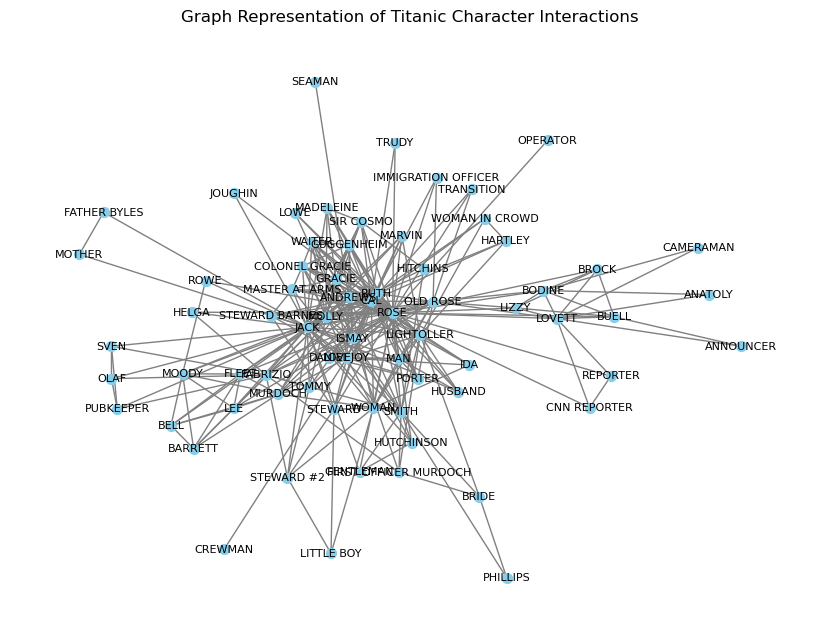

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Loading the files here so we have the character relationships (edges.csv) and character info (nodes.csv)
edges = pd.read_csv('edges.csv')
nodes = pd.read_csv('nodes.csv')

# Starting off by creating an empty graph. It’s undirected because the relationships go both ways.
G = nx.Graph()

# Adding each character as a node. I’m using their 'Id' as the unique identifier and also storing their name and gender.
for index, row in nodes.iterrows():
    G.add_node(row['Id'], label=row['Label'], gender=row['Gender'])

# Adding connections between characters. Each edge here represents an interaction between two characters.
for index, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Using a spring layout because it spreads the graph out naturally, so it’s easier on the eyes.
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # This just determines where the nodes get placed on the canvas.
nx.draw(G, pos, with_labels=False, node_size=50, node_color="skyblue", edge_color="gray")

# Adding labels so we can see who’s who. This helps to keep track of the characters in the graph.
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels, font_size=8)

# The final graph
plt.title("Graph Representation of Titanic Character Interactions")
plt.show()

The graph represents character interactions from the Titanic dataset. Here's a breakdown:
- **Nodes**: Each node represents a character, such as Rose or Jack. The more central a node, the more connections (interactions) that character has.
- **Edges**: These lines between nodes represent the interactions between characters. A denser network of edges means more interactions.
- You can see a densely connected **central cluster**, indicating that certain characters (like **Rose** and **Jack**) interact with many others, making them pivotal in the network.
- **Peripheral nodes**: These are characters on the edge of the network who don’t interact as much or are connected to fewer characters.

### 2. Graph Analysis
Determinate the basic graph indicators:
**Total number of nodes and edges**: to understand the *scale and complexity* of the graph
**Average degree**: giving an average of *connections per node*
**Graph density**:  providing an insight into the *overall connectivity*

In [6]:
# Calculate total number of nodes and edges
total_nodes = G.number_of_nodes()
total_edges = G.number_of_edges()

# Calculate average degree (average number of connections per node)
avg_degree = sum(dict(G.degree()).values()) / total_nodes

# Calculate graph density (measures how close the graph is to complete)
graph_density = nx.density(G)

# Output the results
print(f"Total Number of Nodes: {total_nodes}")
print(f"Total Number of Edges: {total_edges}")
print(f"Average Degree: {avg_degree}")
print(f"Graph Density: {graph_density}")

Total Number of Nodes: 70
Total Number of Edges: 299
Average Degree: 8.542857142857143
Graph Density: 0.12380952380952381


### Graph Analysis Results:

- **Total Number of Nodes**: 70 (This means there are 70 characters in the network).
- **Total Number of Edges**: 299 (This indicates there are 299 relationships or interactions between the characters).
- **Average Degree**: 8.54 (On average, each character interacts with around 8.5 other characters).
- **Graph Density**: 0.124 (The graph is about 12.4% dense, meaning only a small fraction of the total possible connections between characters are realized. It's a moderately sparse network).

### 3. Node analysis
Calculate basic centralities and compare the most central characters.

In [7]:
# Calculate Degree Centrality (proportion of nodes a character is connected to)
degree_centrality = nx.degree_centrality(G)

# Calculate Closeness Centrality (how close a character is to all other characters)
closeness_centrality = nx.closeness_centrality(G)

# Calculate Betweenness Centrality (how often a character is on the shortest path between two others)
betweenness_centrality = nx.betweenness_centrality(G)

# Convert to DataFrame for easy comparison
centrality_df = pd.DataFrame({
    'Character': [G.nodes[node]['label'] for node in G.nodes],
    'Degree Centrality': degree_centrality.values(),
    'Closeness Centrality': closeness_centrality.values(),
    'Betweenness Centrality': betweenness_centrality.values()
})

# Sort the DataFrame by Degree Centrality (you can also sort by the other centralities)
centrality_df = centrality_df.sort_values(by='Degree Centrality', ascending=False)

# Show the top 5 most central characters
centrality_df.head(5)

,Character,Degree Centrality,Closeness Centrality,Betweenness Centrality
0,ROSE,0.666667,0.750000,0.382931
1,JACK,0.565217,0.676471,0.218468
2,CAL,0.478261,0.633028,0.089469
9,RUTH,0.362319,0.594828,0.037141
3,MOLLY,0.333333,0.575000,0.057112


**Rose** is the most central character across all metrics, having the highest degree of connection with other characters, as well as the highest closeness and betweenness centrality.

**Jack** follows as the second most central character.

**Cal**, **Ruth**, and **Molly** are also among the top five in terms of centrality, though their centrality metrics are slightly lower than Rose and Jack.

These central characters are clearly the most influential within the Titanic network, forming key connections and often serving as bridges in interactions.

### 4. Node attributes
Add Gender attribute (from dataset to the network) and calculate and/or visualize the share of females and males characters in the film. Furthermore, subgraph network to only male characters. Who are the main characters, what is their relationship?



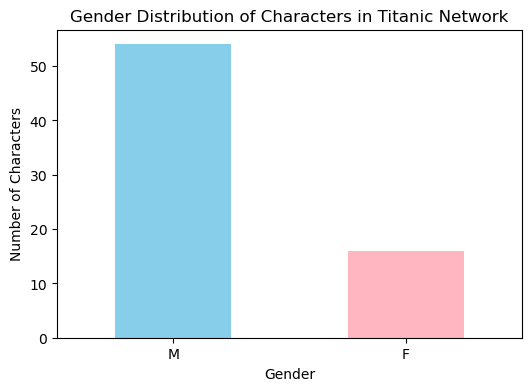

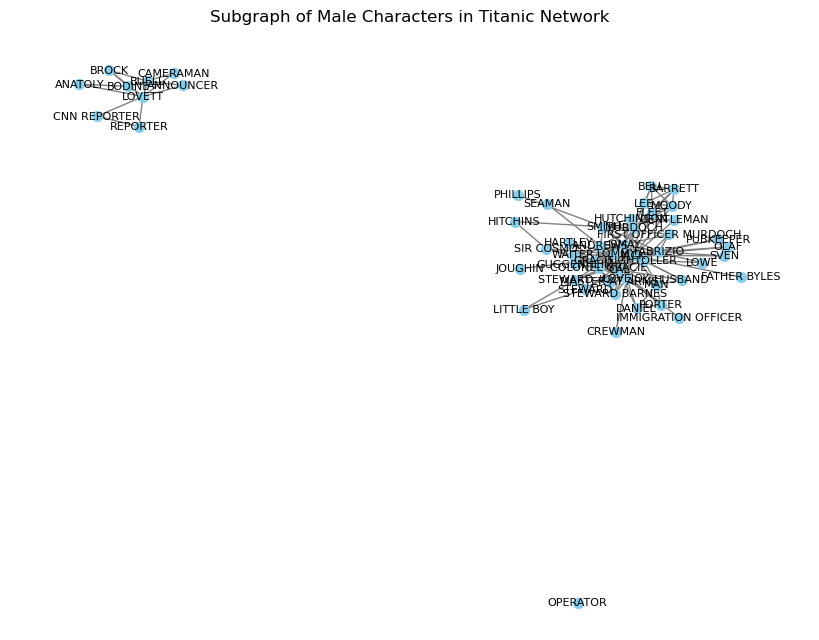

,Character,Degree Centrality
0,JACK,0.547170
1,CAL,0.415094
5,LOVEJOY,0.264151
9,ISMAY,0.245283
6,ANDREWS,0.226415


In [8]:
# Task 1: Gender Distribution
# Count the number of male and female characters
gender_counts = nodes['Gender'].value_counts()

# Plot the gender distribution
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title('Gender Distribution of Characters in Titanic Network')
plt.xlabel('Gender')
plt.ylabel('Number of Characters')
plt.xticks(rotation=0)
plt.show()

# Task 2: Subgraph of Male Characters
# Create a subgraph with only male characters
male_nodes = [node for node, attr in G.nodes(data=True) if attr['gender'] == 'M']
male_subgraph = G.subgraph(male_nodes)

# Visualize the male-only subgraph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(male_subgraph)
nx.draw(male_subgraph, pos, with_labels=False, node_size=50, node_color="skyblue", edge_color="gray")

# Add labels (character names) to the male subgraph
labels = nx.get_node_attributes(male_subgraph, 'label')
nx.draw_networkx_labels(male_subgraph, pos, labels, font_size=8)

plt.title("Subgraph of Male Characters in Titanic Network")
plt.show()

# Analyze centrality in the male subgraph
male_degree_centrality = nx.degree_centrality(male_subgraph)

# Convert to DataFrame for easy comparison and display top male characters by degree centrality
male_centrality_df = pd.DataFrame({
    'Character': [male_subgraph.nodes[node]['label'] for node in male_subgraph.nodes],
    'Degree Centrality': male_degree_centrality.values()
}).sort_values(by='Degree Centrality', ascending=False)

# Show the top 5 most central male characters
male_centrality_df.head(5)

### Task 1: Gender Distribution

**What I used:**
- To accomplish this, I used the `value_counts()` function to count the number of male and female characters in the dataset, and then visualized the distribution using a bar chart (`matplotlib`).

**Why this approach:**
- Using a simple count and bar chart is effective for visualizing categorical data like gender. It provides a clear, quick understanding of how many male and female characters exist in the network.

**Understanding of the results:**
- The results show a clear **imbalance** in gender distribution, with **more male** characters than female characters. This imbalance can affect the dynamics of character interactions and the centrality measures we calculate, as a larger number of male characters might dominate the network structure.

### Task 2: Subgraph of Male Characters

**What I used:**
- I created a **subgraph** using only the male characters by filtering nodes based on their gender attribute. Then, I visualized the subgraph using `networkx` and analyzed it by calculating **degree centrality** for each character to identify the most connected male characters.

**Why this approach:**
- Subgraphing helps isolate a specific subset of the network, in this case, male characters, to focus on their relationships. Degree centrality was chosen as it helps measure which characters are the most "connected" or influential within the subgraph.

**Understanding of the results:**
- In the male-only subgraph, **Jack** emerges as the most central character, followed by **Cal**, **Lovejoy**, **Ismay**, and **Andrews**. This analysis mirrors the broader network, where Jack is also a central figure. The high centrality of these characters suggests that they play pivotal roles in the male character interactions and likely in the overall network of the Titanic characters.

## FINAL ANSWER AND ARGUMENTATION

Even though Jack has a lot of connections, his centrality is just a bit lower than Rose's, meaning he’s not quite as influential in the network. This difference could be why Jack chose to make the ultimate sacrifice. From a graph theory perspective, Jack might have realized he wasn’t as central to the overall story as Rose. That’s why his decision to let her survive makes sense—Rose had more potential to influence others in the long run. Plus, Rose is the main character, and main characters usually don’t die in movies. Jack probably knew the story needed her to survive for everything to play out.